## 03c - Make ILL Visuals 

import:

    00_en_as_rev_outlinks_m.pkl
    00_en_as_rev_time_m.pkl
    ILLdf_en.pkl

    00_ar_as_rev_outlinks_m.pkl
    00_ar_as_rev_time_m.pkl
    03b_ILLdf_ar.pkl
    
output:

    Visuals/03c_ILLlineChart.png
    Visuals/03c_ILLlineChart_ar.png
    
    
    
The Plan:
- this goes through and does some initial work with the outlinks 
- it grabs all of the outlinks in the english and arabic versions of the arab spring
- organize them by ones that are only in each language. 
- identify ones that are in both by if there were english outlinks
- that had an arabic ILL and if that arabic ILL was also an outlink


1. English
2. Arabic


In [ ]:
import numpy as np
import pandas as pd
import wikifunctions as wf
from urllib.parse import unquote
import pickle
import matplotlib.pyplot as plt

## English

In [3]:
#open the English revision outlinks with a revision id

with open('../Data/00_en_as_rev_outlinks_m.pkl', 'rb') as f:
    outlinks = pickle.load(f)
    
outlinks_series = pd.Series(outlinks)

In [10]:
# outlinks_series

In [26]:
#get times
with open('../Data/00_en_as_rev_time_m.pkl', 'rb') as f:
    outlinks_times = pickle.load(f)


In [27]:
outlinks_times

timestamp
2011-01-31 00:00:00+00:00     410393753
2011-02-28 00:00:00+00:00     411278546
2011-03-31 00:00:00+00:00     416471292
2011-04-30 00:00:00+00:00     421746845
2011-05-31 00:00:00+00:00     426865693
                                ...    
2024-02-29 00:00:00+00:00    1203198924
2024-03-31 00:00:00+00:00    1211702017
2024-04-30 00:00:00+00:00    1216904430
2024-05-31 00:00:00+00:00    1222164923
2024-06-30 00:00:00+00:00    1227118198
Freq: M, Name: revid, Length: 162, dtype: int64

In [ ]:
#open the English ILLs df

with open('ILLdf_en.pkl', 'rb') as f:
    data = pickle.load(f)


In [18]:
data.head()

,NoILL its only in English,only in English AS,shared
0,0,6,5
1,2,58,15
2,10,207,39
3,11,161,42
4,11,195,46


In [21]:
#clean
data2 = data.loc[~(data==0).all(axis=1)]

In [28]:
#dropping the last one to get the same length as the dates

# data2.drop(data2.tail().index,inplace=True) # drop last n rows to make it the same as the outlinks

outlinks_times.drop(outlinks_times.tail(2).index,inplace=True)

## 1a. Make English Graph

No handles with labels found to put in legend.


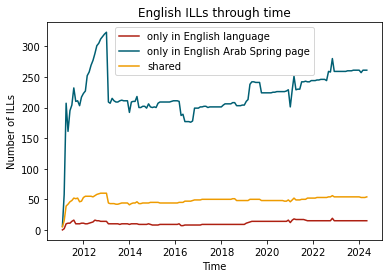

In [36]:
# create data
x = outlinks_times.index
y1 = data2['NoILL its only in English']
y2 = data2['only in English AS']
y3 = data2['shared']
 
#colors to match the network
# plt.plot(x, y1, color='#2d5c40')#dark gree
# plt.plot(x, y2, color='#bd61c9')#pink
# plt.plot(x, y3, color='#42c2f5')#blue

#for the poster
plt.plot(x, y1, color='#AE2012')
plt.plot(x, y2, color='#005F73')
plt.plot(x, y3, color='#EE9B00')
plt.legend()

plt.legend(["only in English language", "only in English Arab Spring page", "shared"])
plt.xlabel("Time")
plt.ylabel("Number of ILLs")
plt.title("English ILLs through time")

plt.savefig("Visuals/03c_ILLlineChart.png")

plt.show()

In [ ]:
#clean it up if necessary

# data.loc[data['NoILL its only in English'] == 0]

,NoILL its only in English,only in English AS,shared
0,0,6,5
30,0,0,0
86,0,0,0


In [34]:
# data = data.drop([30, 86])

In [35]:
# create data
# x = data.index
# y1 = data['NoILL its only in English']
# y2 = data['only in English AS']
# y3 = data['shared']
 
# plt.plot(x, y1, color='dark green')#dark gree
# plt.plot(x, y2, color='magenta')#pink
# plt.plot(x, y3, color='light blue')#blue
# plt.legend()

# plt.legend(["only in English language", "only in English Arab Spring page", "shared"])
# plt.xlabel("Number of Months")
# plt.ylabel("Number of ILLs")
# plt.title("English ILLs through time")

# plt.savefig("03c_ILLlineChart.png")

# plt.show()

## Arabic

In [ ]:
#open the Arabic revision outlinks with a revision id

with open('../Data/00_ar_as_rev_outlinks_m.pkl', 'rb') as f:
    ar_outlinks = pickle.load(f)
    
ar_outlinks_series = pd.Series(ar_outlinks)

In [41]:
# ar_outlinks_series

In [40]:
#02c_ar_as_rev_time_m.pkl

with open('../Data/00_ar_as_rev_time_m.pkl', 'rb') as f:
    ar_times = pickle.load(f)

In [43]:
# ar_times

In [ ]:
#open the Arabic ILLs df

with open('Data/03c_ILLdf_ar.pkl', 'rb') as f:
    ar_data = pickle.load(f)
    

In [20]:
ar_data.head()

,NoILL its only in Arabic,only in Arabic AS,shared
0,0,0,12
1,0,0,12
2,9,32,48
3,7,42,44
4,7,46,46


In [21]:
#dropping the last one to get the same length as the dates
ar_data.drop(ar_data.tail(1).index,inplace=True) # drop last n rows

### make graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


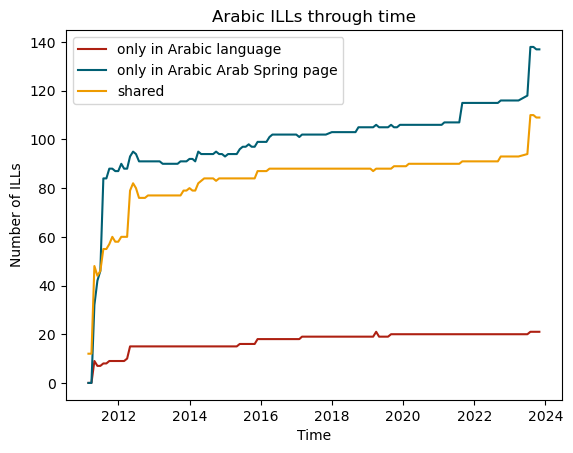

In [ ]:
# create data
x = ar_times.index
y1 = ar_data['NoILL its only in Arabic']
y2 = ar_data['only in Arabic AS']
y3 = ar_data['shared']
 
#network colors
# plt.plot(x, y1, color='#f06075')
# plt.plot(x, y2, color='#7dab6f')
# plt.plot(x, y3, color='#42c2f5')

#poster colors
plt.plot(x, y1, color='#AE2012')
plt.plot(x, y2, color='#005F73')
plt.plot(x, y3, color='#EE9B00')
plt.legend()

plt.legend(["only in Arabic language", "only in Arabic Arab Spring page", "shared"])
plt.xlabel("Time")
plt.ylabel("Number of ILLs")
plt.title("Arabic ILLs through time")

plt.savefig("Visuals/03c_ILLlineChart_ar.png")


plt.show()

In [19]:
print(type(y1))
# y1.drop(y1.index[0])
# y1.iloc[1:]

# print(len(y1))



<class 'pandas.core.series.Series'>
